In [293]:
# Este é um projeto pessoal feito para fazer uma análise da variação e correlação dos valores minerados pela minha Rig de
# mineração de CriptoAtivos. 
# Os dados analisados são resultantes da mineração da criptomoeda Ethereum.
# O DataSet utilizado foi provido pela pool de mineração Flexpool https://www.flexpool.io/pt-BR.

In [294]:
#Importação das bibliotecas

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize =(14, 6))

In [295]:
# Tornando os dados em um pandas DataFrame

pd.read_csv('dados/rewards.csv')   

,Date,Value ETH,Value USD
0,Wed Jun 15 00:00:00 UTC 2022,0.008297,10.246289
1,Tue Jun 14 00:00:00 UTC 2022,0.005209,6.431850
2,Mon Jun 13 00:00:00 UTC 2022,0.010058,12.420222
3,Sun Jun 12 00:00:00 UTC 2022,0.007079,8.741914
4,Sat Jun 11 00:00:00 UTC 2022,0.006261,7.731913
...,...,...,...
120,Tue Feb 15 00:00:00 UTC 2022,0.003178,3.924585
121,Mon Feb 14 00:00:00 UTC 2022,0.002687,3.317685
122,Sun Feb 13 00:00:00 UTC 2022,0.002504,3.092310
123,Sat Feb 12 00:00:00 UTC 2022,0.003343,4.127854


In [296]:
#Gerando uma váriavel para armazenar o DataFrame

dados = pd.read_csv('dados/rewards.csv') 
dados

,Date,Value ETH,Value USD
0,Wed Jun 15 00:00:00 UTC 2022,0.008297,10.246289
1,Tue Jun 14 00:00:00 UTC 2022,0.005209,6.431850
2,Mon Jun 13 00:00:00 UTC 2022,0.010058,12.420222
3,Sun Jun 12 00:00:00 UTC 2022,0.007079,8.741914
4,Sat Jun 11 00:00:00 UTC 2022,0.006261,7.731913
...,...,...,...
120,Tue Feb 15 00:00:00 UTC 2022,0.003178,3.924585
121,Mon Feb 14 00:00:00 UTC 2022,0.002687,3.317685
122,Sun Feb 13 00:00:00 UTC 2022,0.002504,3.092310
123,Sat Feb 12 00:00:00 UTC 2022,0.003343,4.127854


In [297]:
#Renomeando as colunas para melhor visualização dos dados

dados.rename(columns = {'Date':'Data', 'Value ETH':'Valor em Eth', 'Value USD': 'Valor em dólar'}, inplace = True)


In [298]:
dados

,Data,Valor em Eth,Valor em dólar
0,Wed Jun 15 00:00:00 UTC 2022,0.008297,10.246289
1,Tue Jun 14 00:00:00 UTC 2022,0.005209,6.431850
2,Mon Jun 13 00:00:00 UTC 2022,0.010058,12.420222
3,Sun Jun 12 00:00:00 UTC 2022,0.007079,8.741914
4,Sat Jun 11 00:00:00 UTC 2022,0.006261,7.731913
...,...,...,...
120,Tue Feb 15 00:00:00 UTC 2022,0.003178,3.924585
121,Mon Feb 14 00:00:00 UTC 2022,0.002687,3.317685
122,Sun Feb 13 00:00:00 UTC 2022,0.002504,3.092310
123,Sat Feb 12 00:00:00 UTC 2022,0.003343,4.127854


In [299]:
#Convertendo a coluna Data em "datetime" para poder gerar os dias da semana

dados['Data'] = pd.to_datetime(dados['Data'])      

In [300]:
#Acrescentando a coluna com os dias da semana

dados['Dia da Semana'] = dados['Data'].dt.day_name() 

In [301]:
dados

,Data,Valor em Eth,Valor em dólar,Dia da Semana
0,2022-06-15 00:00:00+00:00,0.008297,10.246289,Wednesday
1,2022-06-14 00:00:00+00:00,0.005209,6.431850,Tuesday
2,2022-06-13 00:00:00+00:00,0.010058,12.420222,Monday
3,2022-06-12 00:00:00+00:00,0.007079,8.741914,Sunday
4,2022-06-11 00:00:00+00:00,0.006261,7.731913,Saturday
...,...,...,...,...
120,2022-02-15 00:00:00+00:00,0.003178,3.924585,Tuesday
121,2022-02-14 00:00:00+00:00,0.002687,3.317685,Monday
122,2022-02-13 00:00:00+00:00,0.002504,3.092310,Sunday
123,2022-02-12 00:00:00+00:00,0.003343,4.127854,Saturday


In [302]:
# Traduzindo a coluna Dia da Semana para português

dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [303]:
dados["Dia da Semana"] = dados['Dia da Semana'].map(dias_traduzidos)

In [304]:
dados.head(14)

,Data,Valor em Eth,Valor em dólar,Dia da Semana
0,2022-06-15 00:00:00+00:00,0.008297,10.246289,Quarta
1,2022-06-14 00:00:00+00:00,0.005209,6.431850,Terça
2,2022-06-13 00:00:00+00:00,0.010058,12.420222,Segunda
3,2022-06-12 00:00:00+00:00,0.007079,8.741914,Domingo
4,2022-06-11 00:00:00+00:00,0.006261,7.731913,Sábado
5,2022-06-10 00:00:00+00:00,0.007940,9.805091,Sexta
6,2022-06-09 00:00:00+00:00,0.006974,8.612076,Quinta
7,2022-06-08 00:00:00+00:00,0.005756,7.107761,Quarta
8,2022-06-07 00:00:00+00:00,0.006395,7.896504,Terça
9,2022-06-06 00:00:00+00:00,0.006833,8.437925,Segunda


In [305]:
print('A quantidade de linhas e colunas é:', dados.shape)
print('Quantidade de dados nulos:', dados.isna().sum().sum())

A quantidade de linhas e colunas é: (125, 4)
Quantidade de dados nulos: 0


In [306]:
# Descobrindo o tipo dos dados no DataFrame

dados.dtypes     

Data              datetime64[ns, UTC]
Valor em Eth                  float64
Valor em dólar                float64
Dia da Semana                  object
dtype: object

In [307]:
 #Descrevendo as estatísticas das colunas do DataFrame
    
dados[['Valor em Eth', 'Valor em dólar']].describe()

,Valor em Eth,Valor em dólar
count,125.000000,125.000000
mean,0.005212,6.435776
std,0.001584,1.956651
min,0.001302,1.607437
25%,0.004155,5.130650
50%,0.005335,6.587672
75%,0.005919,7.309583
max,0.013434,16.588936


In [308]:
dados.info

<bound method DataFrame.info of                          Data  Valor em Eth  Valor em dólar Dia da Semana
0   2022-06-15 00:00:00+00:00      0.008297       10.246289        Quarta
1   2022-06-14 00:00:00+00:00      0.005209        6.431850         Terça
2   2022-06-13 00:00:00+00:00      0.010058       12.420222       Segunda
3   2022-06-12 00:00:00+00:00      0.007079        8.741914       Domingo
4   2022-06-11 00:00:00+00:00      0.006261        7.731913        Sábado
..                        ...           ...             ...           ...
120 2022-02-15 00:00:00+00:00      0.003178        3.924585         Terça
121 2022-02-14 00:00:00+00:00      0.002687        3.317685       Segunda
122 2022-02-13 00:00:00+00:00      0.002504        3.092310       Domingo
123 2022-02-12 00:00:00+00:00      0.003343        4.127854        Sábado
124 2022-02-11 00:00:00+00:00      0.002145        2.648494         Sexta

[125 rows x 4 columns]>

In [309]:
 ## Visualizando apenas os dias que me retornaram mais ou igual a 10 dólares
    
dados[dados['Valor em dólar'] >= 10].round(2)    

,Data,Valor em Eth,Valor em dólar,Dia da Semana
0,2022-06-15 00:00:00+00:00,0.01,10.25,Quarta
2,2022-06-13 00:00:00+00:00,0.01,12.42,Segunda
34,2022-05-12 00:00:00+00:00,0.01,10.93,Quinta
45,2022-05-01 00:00:00+00:00,0.01,16.59,Domingo
71,2022-04-05 00:00:00+00:00,0.01,10.03,Terça


<AxesSubplot:>

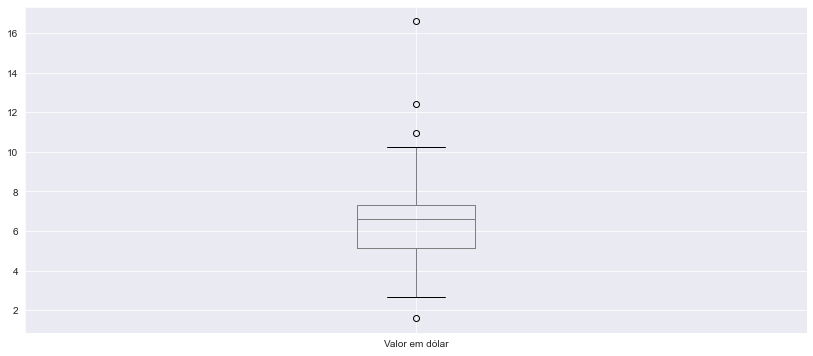

In [310]:
 #Plotando um gráfico para melhor visualização
dados.boxplot(['Valor em dólar'])     

In [311]:
valor = dados['Valor em dólar']

In [312]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [313]:
#atualizando a variável dados com o processamento da equação

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]               

<AxesSubplot:>

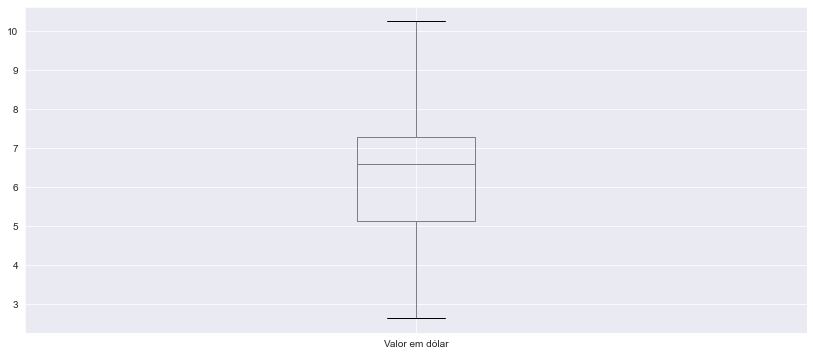

In [314]:
#Plotando um gráfico sobre a variável atualizada 

dados_new.boxplot(['Valor em dólar'])     

array([[<AxesSubplot:title={'center':'Valor em dólar'}>]], dtype=object)

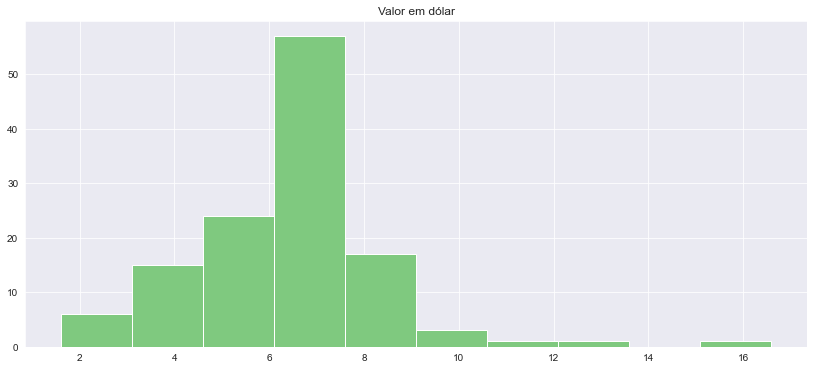

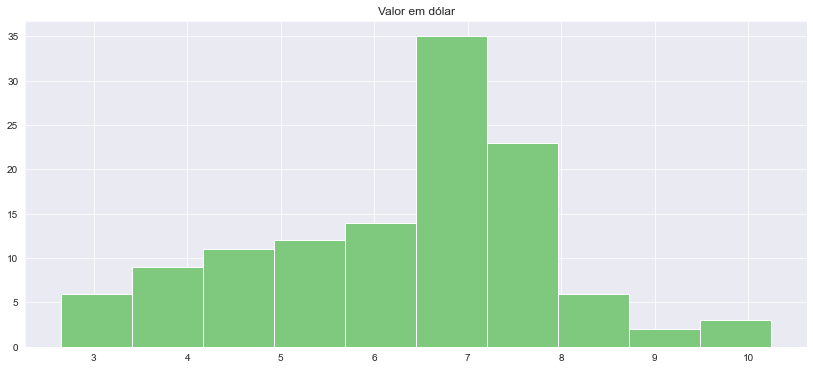

In [315]:
dados.hist(['Valor em dólar'])       # Plotando o histórico dos valores sem a equação
dados_new.hist(['Valor em dólar'])   # Plotando o histórico dos valores atualizados após o processamento da equação

In [316]:
dados.dtypes    #Visualizando os tipos das nossas colunas.


Data              datetime64[ns, UTC]
Valor em Eth                  float64
Valor em dólar                float64
Dia da Semana                  object
dtype: object

In [317]:
import seaborn as sns    #Importando a biblioteca seaborn para auxiliar na visualização dos dados


In [318]:
print(sns.__version__)  #Verificando a versão utilizada


0.11.2


<AxesSubplot:xlabel='Data', ylabel='Valor em dólar'>

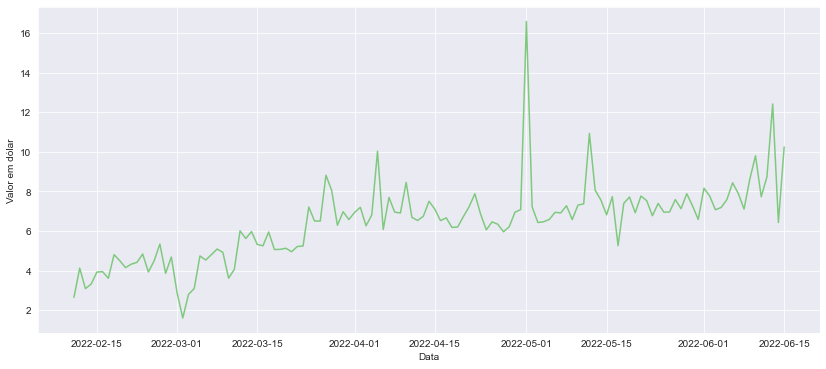

In [319]:
sns.lineplot(x = "Data", y = "Valor em dólar", data= dados) #Analisando a variação por onde x é a Data e y o Valor.

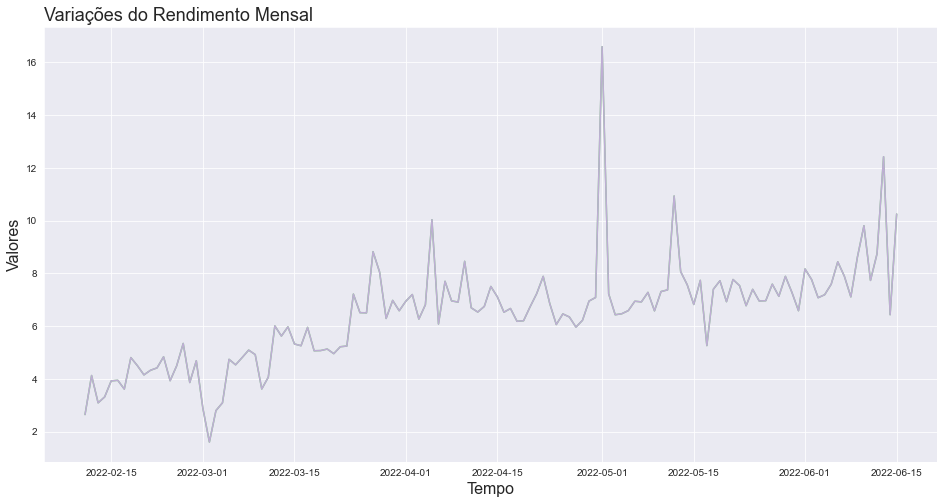

In [273]:
#Algumas alterações no Gráfico para auxiliar na visualização e interpretação

sns.set_palette('Accent')
sns.set_style('darkgrid')
sns.lineplot(x = 'Data', y ='Valor em dólar', data = dados)
ax = sns.lineplot(x = "Data", y = "Valor em dólar", data= dados)
ax.figure.set_size_inches(16,8)
ax.set_title('Variações do Rendimento Mensal', loc='left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 16)
ax.set_ylabel('Valores', fontsize = 16)
ax = ax

In [274]:
#Função para Plotar o gráfico. 

def plotar (titulo, labelx, labely, x, y, dataset): 
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(14,8)
  ax.set_title(titulo, loc='left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

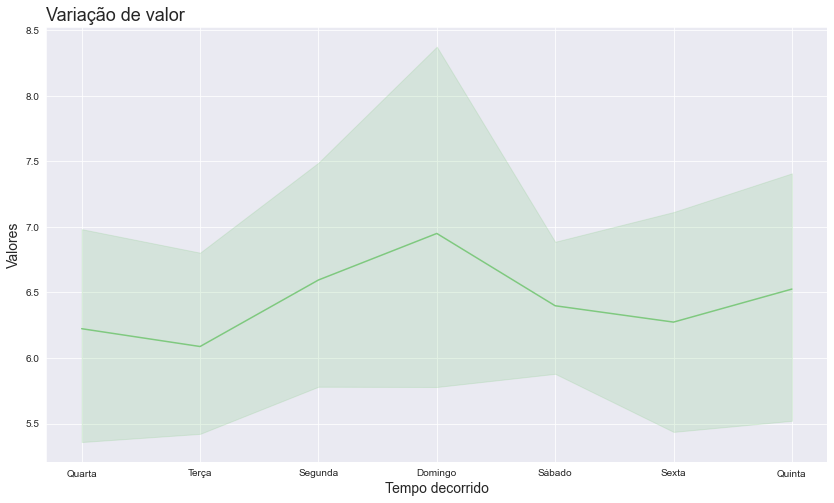

In [275]:
plotar("Variação de valor", "Tempo decorrido", "Valores", "Dia da Semana", "Valor em dólar", dados)

In [276]:
#.diff diminuiu o Valor em dólar de index 1 do index 0 e assim por diante, assim é criada a nova coluna Variação_de_valor

dados['Variação de valor'] = dados['Valor em dólar'].diff().round(2)        
dados.head(10)

,Data,Valor em Eth,Valor em dólar,Dia da Semana,Variação de valor
0,2022-06-15 00:00:00+00:00,0.008297,10.246289,Quarta,NaN
1,2022-06-14 00:00:00+00:00,0.005209,6.431850,Terça,-3.81
2,2022-06-13 00:00:00+00:00,0.010058,12.420222,Segunda,5.99
3,2022-06-12 00:00:00+00:00,0.007079,8.741914,Domingo,-3.68
4,2022-06-11 00:00:00+00:00,0.006261,7.731913,Sábado,-1.01
5,2022-06-10 00:00:00+00:00,0.007940,9.805091,Sexta,2.07
6,2022-06-09 00:00:00+00:00,0.006974,8.612076,Quinta,-1.19
7,2022-06-08 00:00:00+00:00,0.005756,7.107761,Quarta,-1.50
8,2022-06-07 00:00:00+00:00,0.006395,7.896504,Terça,0.79
9,2022-06-06 00:00:00+00:00,0.006833,8.437925,Segunda,0.54


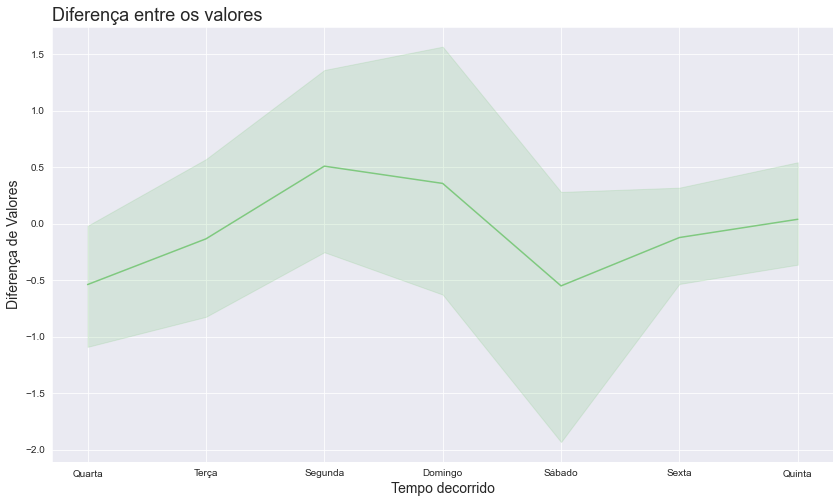

In [277]:
plotar('Diferença entre os valores', 'Tempo decorrido', 'Diferença de Valores', 'Dia da Semana','Variação de valor', dados)

In [278]:
from pandas.plotting import autocorrelation_plot  #Importando a função de Autocorrelação.

In [279]:
##Autocorrelação	    Interpretação

#  1                   correlação perfeita positiva
#  0,7 a 0,9	       correlação forte
#  0,4 a 0,7	       correlação moderada
#  0,2 a 0,4	       correlação fraca
#  0	               correlação nula
#  < 0	               correlação negativa
#  -1	               correlação perfeita negativa

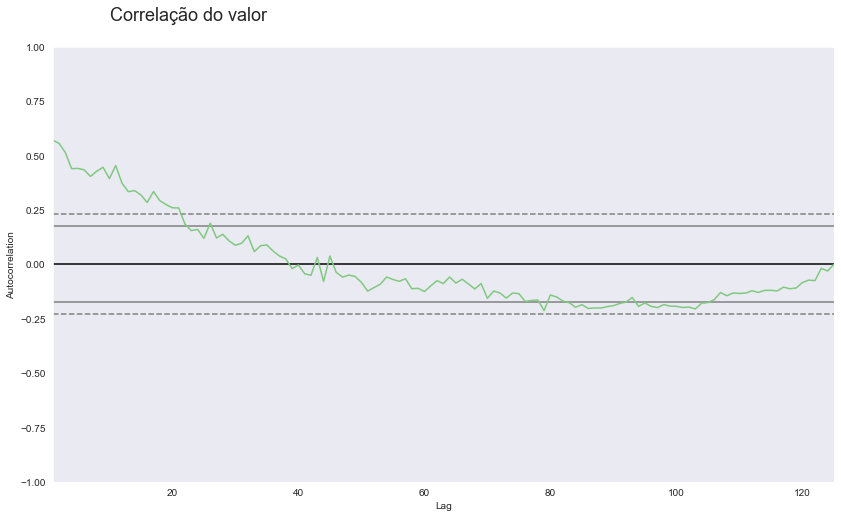

In [280]:
ax = plt.figure(figsize =(14,8))
ax.suptitle('Correlação do valor', fontsize = 18, x = 0.26, y =0.95)
autocorrelation_plot(dados['Valor em dólar'])
ax = ax

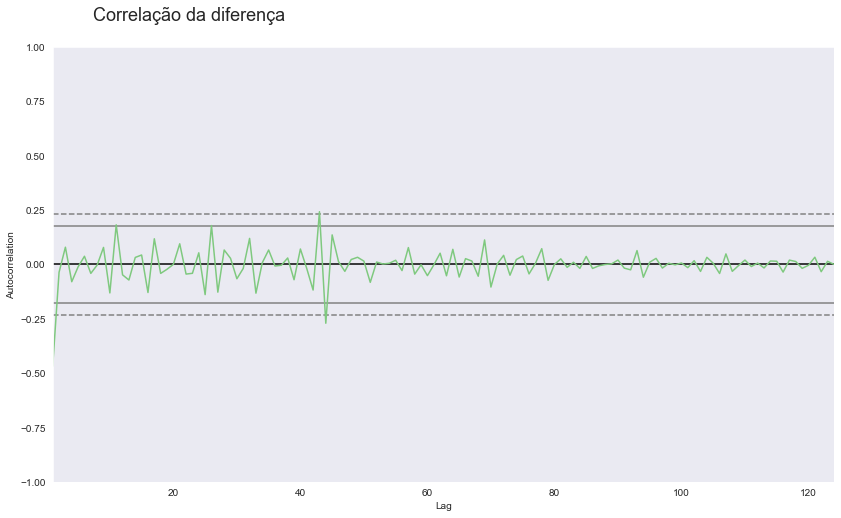

In [281]:
ax = plt.figure(figsize =(14,8))
ax.suptitle('Correlação da diferença', fontsize = 18, x = 0.26, y =0.95)
autocorrelation_plot(dados['Variação de valor'][1:]) # Uso [1:] pois a coluna 'Variação de valor'tem valor a partir do indice 1.
ax = ax

In [320]:
# Statsmodels é um pacote do Python que nos permite explorar os dados, estimar modelos estatísticos, e performar testes estatísticos.
# Função seasonal_decompose para fazer a Decomposição sazonal dos dados.

from statsmodels.tsa.seasonal import seasonal_decompose 

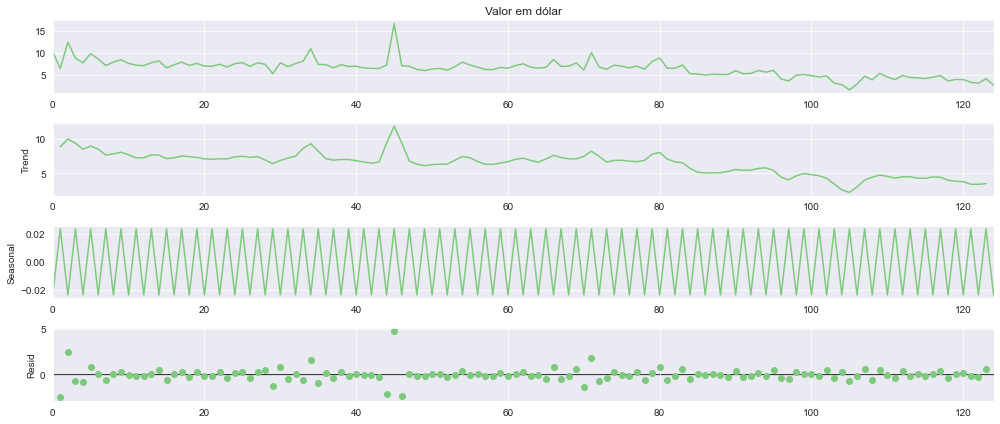

In [321]:
resultados = seasonal_decompose(dados['Valor em dólar'], period = 2)
ax = resultados.plot()

In [322]:
observacao = resultados.observed
tendencia = resultados.trend
sazonalidade = resultados.seasonal
ruido = resultados.resid

In [323]:
#Transformando os dados em um DataFrame 

df = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultados = pd.DataFrame(df)
resultados.head()

,observacao,tendencia,sazonalidade,ruido
0,10.246289,NaN,-0.023672,NaN
1,6.431850,8.882553,0.023672,-2.474375
2,12.420222,10.003552,-0.023672,2.440342
3,8.741914,9.408991,0.023672,-0.690749
4,7.731913,8.502708,-0.023672,-0.747123


In [324]:
# Criação de uma função para comparar os gráficos

def plot_comparacao(x, y1, y2, y3, dataset, titulo):

  plt.figure(figsize = (22,18))                      
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  ax = sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  ax = sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  ax = sns.lineplot(x = x, y = y3, data = dataset)
  ax = ax

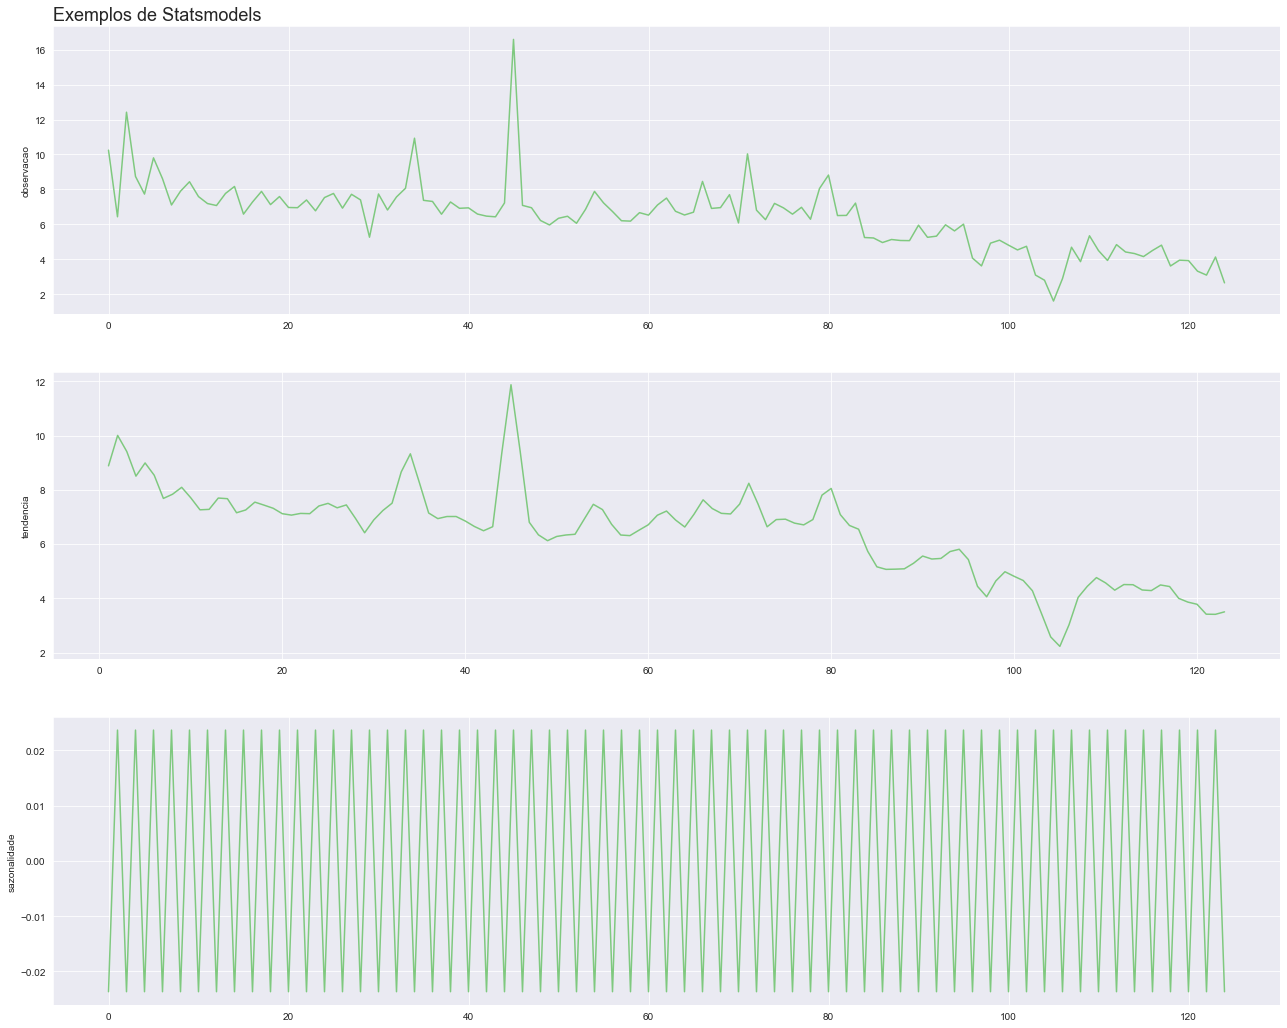

In [325]:
# Comparação dos Statsmodels

plot_comparacao(resultados.index, "observacao", "tendencia","sazonalidade", resultados, "Exemplos de Statsmodels")